# Part III Machine Learning model training

In [45]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix, classification_report

import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# prepare our independent and dependent variables

df = pd.read_csv('diabetes_data_clean.csv')
df.head()

,age,ismale,polyuria,polydipsia,sudden weight loss,weakness,polyphagia,genital thrush,visual blurring,itching,irritability,delayed healing,partial paresis,muscle stiffness,alopecia,obesity,class
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


In [5]:
X = df.drop('class', axis = 1)
y = df.loc[:, 'class']

In [6]:
y

0      1
1      1
2      1
3      1
4      1
      ..
515    1
516    1
517    1
518    0
519    0
Name: class, Length: 520, dtype: int64

In [13]:
# split data into train and test

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.2,
                                                   stratify = y)

In [14]:
#begin our model training
# start with DummyClassifier to establish baseline DummyClassifier randomly guesses if a patient has or not diabets

dummy = DummyClassifier()
dummy.fit(X_train, y_train)
dummy_pred = dummy.predict(X_test)


In [15]:
#assess DummyClassifier model
confusion_matrix(y_test, dummy_pred)

array([[ 0, 40],
       [ 0, 64]], dtype=int64)

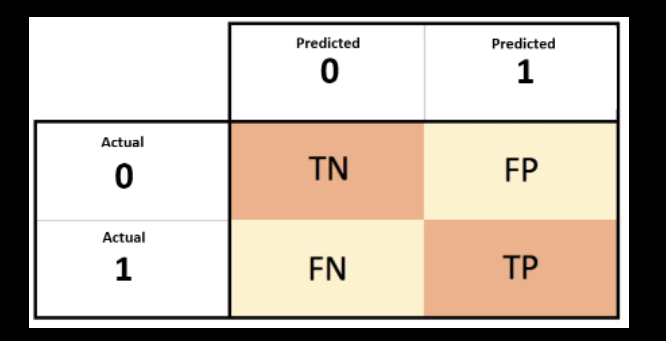

In [17]:
logr = LogisticRegression()
logr.fit(X_train, y_train)
logr_pred = logr.predict(X_test)

In [18]:
confusion_matrix(y_test, logr_pred)

array([[34,  6],
       [ 4, 60]], dtype=int64)

In [19]:
print(classification_report(y_test, logr_pred))

              precision    recall  f1-score   support

           0       0.89      0.85      0.87        40
           1       0.91      0.94      0.92        64

    accuracy                           0.90       104
   macro avg       0.90      0.89      0.90       104
weighted avg       0.90      0.90      0.90       104



In [20]:
# try decision tree

tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
tree_pred = tree.predict(X_test)

In [21]:
confusion_matrix(y_test, tree_pred)

array([[39,  1],
       [ 3, 61]], dtype=int64)

In [22]:
print(classification_report(y_test, tree_pred))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95        40
           1       0.98      0.95      0.97        64

    accuracy                           0.96       104
   macro avg       0.96      0.96      0.96       104
weighted avg       0.96      0.96      0.96       104



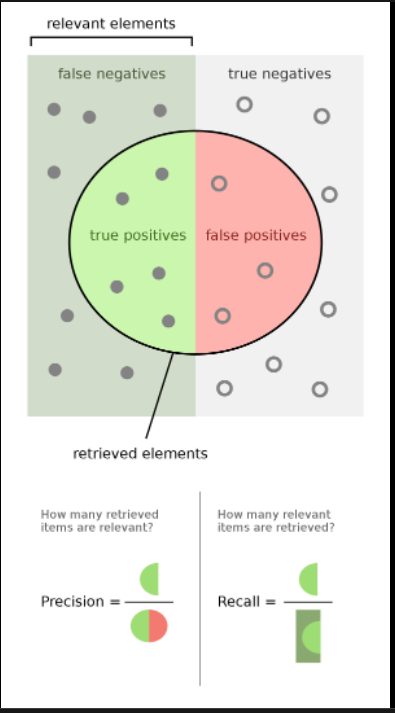

In [24]:
# try RandomForest
forest = RandomForestClassifier()
forest.fit(X_train, y_train)
forest_pred = forest.predict(X_test)

In [25]:
confusion_matrix(y_test, forest_pred)

array([[39,  1],
       [ 1, 63]], dtype=int64)

In [26]:
print(classification_report(y_test, forest_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        40
           1       0.98      0.98      0.98        64

    accuracy                           0.98       104
   macro avg       0.98      0.98      0.98       104
weighted avg       0.98      0.98      0.98       104



In [28]:
forest.feature_importances_ #get an array of the columns importances

array([0.10075055, 0.09533157, 0.25128098, 0.1957497 , 0.04453772,
       0.02023779, 0.03246782, 0.01908643, 0.02701232, 0.02460124,
       0.03844574, 0.02894462, 0.05106924, 0.02110586, 0.03070378,
       0.01867465])

In [29]:
X.columns #we can check the columns

Index(['age', 'ismale', 'polyuria', 'polydipsia', 'sudden weight loss',
       'weakness', 'polyphagia', 'genital thrush', 'visual blurring',
       'itching', 'irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'alopecia', 'obesity'],
      dtype='object')

In [38]:
feature_importance = pd.DataFrame(
    {'feature': X.columns, 'importance':forest.feature_importances_}).sort_values('importance', 
                                                                                  ascending=False)
feature_importance

,feature,importance
2,polyuria,0.251281
3,polydipsia,0.195750
0,age,0.100751
1,ismale,0.095332
12,partial paresis,0.051069
4,sudden weight loss,0.044538
10,irritability,0.038446
6,polyphagia,0.032468
14,alopecia,0.030704
11,delayed healing,0.028945


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'polyuria'),
  Text(1, 0, 'polydipsia'),
  Text(2, 0, 'age'),
  Text(3, 0, 'ismale'),
  Text(4, 0, 'partial paresis'),
  Text(5, 0, 'sudden weight loss'),
  Text(6, 0, 'irritability'),
  Text(7, 0, 'polyphagia'),
  Text(8, 0, 'alopecia'),
  Text(9, 0, 'delayed healing'),
  Text(10, 0, 'visual blurring'),
  Text(11, 0, 'itching'),
  Text(12, 0, 'muscle stiffness'),
  Text(13, 0, 'weakness'),
  Text(14, 0, 'genital thrush'),
  Text(15, 0, 'obesity')])

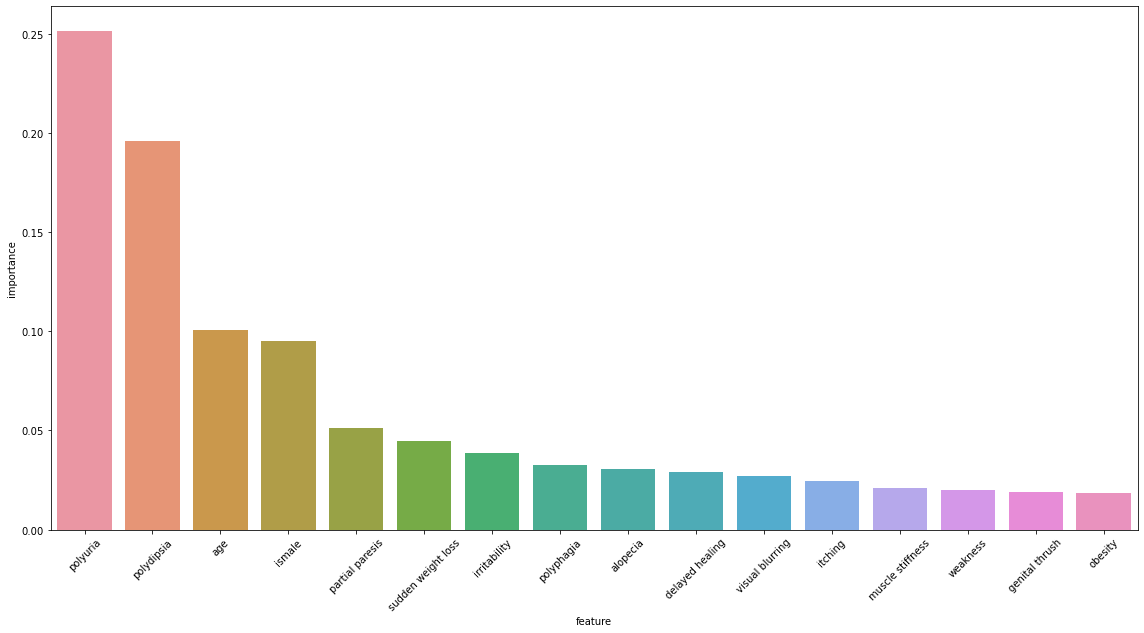

In [50]:
fig, ax = plt.subplots(figsize=(16,8))
sns.barplot(x='feature', y='importance', data=feature_importance)
plt.tight_layout()
plt.xticks(rotation=45)

Summary:
1. Trained a baseline model
2. Trained 3 different models (logistic regression, decision tree, random forest)
3. Identified the important features in the best performing model 